<a href="https://colab.research.google.com/github/VenkatNarayananManjunath/AI-Experiments/blob/main/EXP1LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

WORD: ['tokenization', 'techniques', 'are', 'crucial', 'for', 'large', 'language', 'models']
CHAR: ['t', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', ' ', 't', 'e', 'c', 'h', 'n', 'i', 'q', 'u', 'e', 's', ' ', 'a', 'r', 'e', ' ', 'c', 'r', 'u', 'c', 'i', 'a', 'l', ' ', 'f', 'o', 'r', ' ', 'l', 'a', 'r', 'g', 'e', ' ', 'l', 'a', 'n', 'g', 'u', 'a', 'g', 'e', ' ', 'm', 'o', 'd', 'e', 'l', 's']
BPE: ['To', 'keni', 'zat', 'io', 'n', 'tech', 'niqu', 'es', 'are', 'cr', 'uci', 'al', 'fo', 'r', 'lar', 'ge', 'lan', 'gu', 'age', 'mo', 'de', 'ls']
WORDPIECE: ['token', '##ization', 'techniques', 'are', 'crucial', 'for', 'large', 'language', 'models']
SHAPES: torch.Size([1, 11, 768]) torch.Size([1, 768]) torch.Size([1, 768])


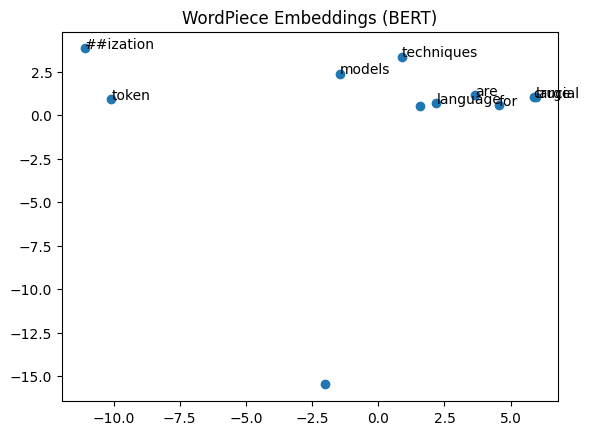

In [2]:
import torch,nltk,matplotlib.pyplot as plt; from nltk.tokenize import word_tokenize; from tokenizers import Tokenizer; from tokenizers.models import BPE; from tokenizers.trainers import BpeTrainer; from tokenizers.pre_tokenizers import Whitespace; from transformers import AutoTokenizer,AutoModel; from sklearn.decomposition import PCA
nltk.download("punkt")
nltk.download("punkt_tab")

text="Tokenization techniques are crucial for large language models"
word_tokens=word_tokenize(text.lower())
char_tokens=list(text.lower())

bpe_tok=Tokenizer(BPE()); bpe_tok.pre_tokenizer=Whitespace()
bpe_tok.train_from_iterator([text],BpeTrainer(vocab_size=50,special_tokens=["[UNK]"]))
bpe_tokens=bpe_tok.encode(text).tokens

wp_tok=AutoTokenizer.from_pretrained("bert-base-uncased")
wp_tokens=wp_tok.tokenize(text)

model=AutoModel.from_pretrained("bert-base-uncased"); model.eval()
inputs=wp_tok(text,return_tensors="pt")
with torch.no_grad(): outputs=model(**inputs)

token_emb=outputs.last_hidden_state; cls_emb=token_emb[:,0,:]; mean_emb=token_emb.mean(dim=1)

print("WORD:",word_tokens)
print("CHAR:",char_tokens)
print("BPE:",bpe_tokens)
print("WORDPIECE:",wp_tokens)
print("SHAPES:",token_emb.shape,cls_emb.shape,mean_emb.shape)

pca=PCA(n_components=2); reduced=pca.fit_transform(token_emb.squeeze(0).numpy())
plt.scatter(reduced[:,0],reduced[:,1])
[plt.annotate(tok,(reduced[i,0],reduced[i,1])) for i,tok in enumerate(wp_tokens)]
plt.title("WordPiece Embeddings (BERT)"); plt.show()